In [1]:
import numpy as np

import pandas as pd

import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
pip install tensorflow

  Using cached tensorflow-2.10.0-cp39-cp39-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (578.1 MB)
  Using cached flatbuffers-22.10.26-py2.py3-none-any.whl (26 kB)
  Using cached opt_einsum-3.3.0-py3-none-any.whl (65 kB)
  Using cached gast-0.4.0-py3-none-any.whl (9.8 kB)
  Using cached libclang-14.0.6-py2.py3-none-manylinux2010_x86_64.whl (14.1 MB)
  Using cached h5py-3.7.0-cp39-cp39-manylinux_2_12_x86_64.manylinux2010_x86_64.whl (4.5 MB)
  Using cached absl_py-1.3.0-py3-none-any.whl (124 kB)
  Using cached termcolor-2.1.0-py3-none-any.whl (5.8 kB)
  Using cached Keras_Preprocessing-1.1.2-py2.py3-none-any.whl (42 kB)
  Using cached keras-2.10.0-py2.py3-none-any.whl (1.7 MB)
  Using cached tensorboard-2.10.1-py3-none-any.whl (5.9 MB)
  Using cached tensorflow_io_gcs_filesystem-0.27.0-cp39-cp39-manylinux_2_12_x86_64.manylinux2010_x86_64.whl (2.4 MB)
  Using cached tensorflow_estimator-2.10.0-py2.py3-none-any.whl (438 kB)
  Using cached astunparse-1.6.3-py2.py3-none-any.whl (12 kB)
  U

In [3]:
import tensorflow as tf
from tensorflow import keras

2022-11-11 06:39:45.201640: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F AVX512_VNNI FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2022-11-11 06:39:45.360007: I tensorflow/core/util/util.cc:169] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2022-11-11 06:39:45.398933: E tensorflow/stream_executor/cuda/cuda_blas.cc:2981] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2022-11-11 06:39:46.134212: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer.so.7'; 

!wget https://www.kaggle.com/datasets/agrigorev/dino-or-dragon

In [4]:
from tensorflow.keras.preprocessing.image import load_img 

In [5]:
ls


07-augmentations.ipynb                    dino-or-dragon.1
07-neural-nets-test.ipynb                 dino-or-dragon.2
07-neural-nets-train.ipynb                home_work8.ipynb
0fc2966d-9d51-466a-abc0-bbee581045d3.jpg  xception_v3_12_0.839.h5
dino-or-dragon                            xception_v3_21_0.842.h5
Dino-or-Dragon/                           xception_v3_22_0.848.h5


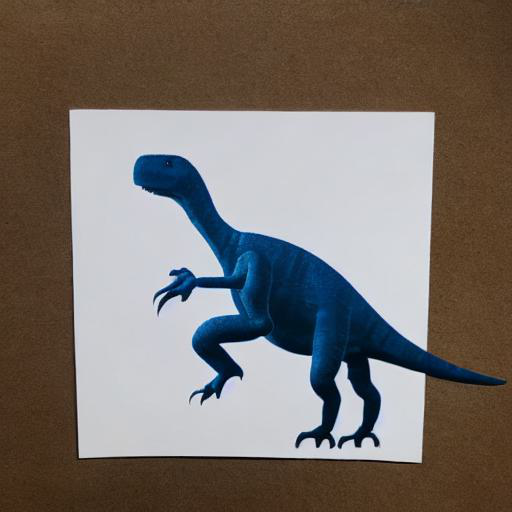

In [6]:
path = './Dino-or-Dragon/train/dino'
name = '0fc2966d-9d51-466a-abc0-bbee581045d3.jpg'
fullname = path + '/' + name
load_img(fullname)

#### Creating Architecture

In [7]:
image_size = (150, 150)
input_size=(150, 150, 3)
filters=32
filter_size=(3, 3)

In [8]:
base_model = tf.keras.layers.Conv2D(
    filters = filters,
    kernel_size = filter_size,
    activation = 'relu'
    )


inputs = keras.Input(shape=input_size)
base = base_model(inputs)
result = tf.keras.layers.MaxPooling2D(pool_size=(2, 2))(base)
vector = tf.keras.layers.Flatten()(result)
dense_layer = keras.layers.Dense(64, activation='relu')(vector)
outputs = keras.layers.Dense(1,activation='sigmoid')(dense_layer)

model = keras.Model(inputs, outputs)
model.compile(
        optimizer=tf.keras.optimizers.SGD(learning_rate=0.01, momentum=0.8),
        loss=keras.losses.BinaryCrossentropy(from_logits=False),
        metrics=["accuracy"],
    )

2022-11-11 06:39:48.324773: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:980] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-11-11 06:39:48.559381: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudnn.so.8'; dlerror: libcudnn.so.8: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /usr/local/nvidia/lib:/usr/local/nvidia/lib64
2022-11-11 06:39:48.559425: W tensorflow/core/common_runtime/gpu/gpu_device.cc:1934] Cannot dlopen some GPU libraries. Please make sure the missing libraries mentioned above are installed properly if you would like to use GPU. Follow the guide at https://www.tensorflow.org/install/gpu for how to download and setup the required libraries for your platform.
Skipping registering GPU devices...
2022-11-11 06:39:48.559901: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow bin

## Question 1
Since we have a binary classification problem, what is the best loss function for us?

binary crossentropy
focal loss
mean squared error
categorical crossentropy
Note: since we specify an activation for the output layer, we don't need to set from_logits=True 

Ans: binary crossentropy

## Question 2
What's the total number of parameters of the model? You can use the summary method for that.

9215873
11215873
14215873
19215873

In [9]:
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 150, 150, 3)]     0         
                                                                 
 conv2d (Conv2D)             (None, 148, 148, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 74, 74, 32)       0         
 )                                                               
                                                                 
 flatten (Flatten)           (None, 175232)            0         
                                                                 
 dense (Dense)               (None, 64)                11214912  
                                                                 
 dense_1 (Dense)             (None, 1)                 65        
                                                             

Ans: 11,215,873 parameters.

#### Dataset generation & Training.
    
    
  

In [10]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [11]:
train_gen = ImageDataGenerator(rescale=1./255)

train_ds = train_gen.flow_from_directory(
    "./Dino-or-Dragon/train",
    shuffle=True,
    class_mode = 'binary',
    target_size=image_size,
    batch_size=20,
)

validation_gen = ImageDataGenerator(rescale=1./255)
val_ds = validation_gen.flow_from_directory(
    "./Dino-or-Dragon/test",
     shuffle=True,
    class_mode = 'binary',
    target_size=image_size,
    batch_size=20,
)

Found 1594 images belonging to 2 classes.
Found 394 images belonging to 2 classes.


In [12]:
train_ds.class_indices

{'dino': 0, 'dragon': 1}

In [13]:
history = model.fit(
    train_ds,
    epochs=10,
    validation_data=val_ds
)

Epoch 1/10
80/80 [==============================] - 13s 161ms/step - loss: 0.6662 - accuracy: 0.6192 - val_loss: 0.5788 - val_accuracy: 0.7665
Epoch 2/10
80/80 [==============================] - 11s 140ms/step - loss: 0.4945 - accuracy: 0.7854 - val_loss: 0.4186 - val_accuracy: 0.8020
Epoch 3/10
80/80 [==============================] - 11s 142ms/step - loss: 0.3486 - accuracy: 0.8664 - val_loss: 0.3856 - val_accuracy: 0.8299
Epoch 4/10
80/80 [==============================] - 11s 141ms/step - loss: 0.2521 - accuracy: 0.9122 - val_loss: 0.4063 - val_accuracy: 0.8071
Epoch 5/10
80/80 [==============================] - 11s 141ms/step - loss: 0.1520 - accuracy: 0.9473 - val_loss: 0.3110 - val_accuracy: 0.8706
Epoch 6/10
80/80 [==============================] - 11s 141ms/step - loss: 0.1037 - accuracy: 0.9699 - val_loss: 0.2704 - val_accuracy: 0.8883
Epoch 7/10
80/80 [==============================] - 11s 142ms/step - loss: 0.0414 - accuracy: 0.9925 - val_loss: 0.2950 - val_accuracy: 0.8832

## Question 3
What is the median of training accuracy for all the epochs for this model?

0.40
0.60
0.90
0.20

In [14]:
np.median(history.history['accuracy'])

0.9585947394371033

Ans: 0.90

## Question 4
What is the standard deviation of training loss for all the epochs for this model?

0.11
0.66
0.99
0.33

In [15]:
np.std(history.history['loss'])

0.21777426669918726

Ans: 0.11

#### Data Augmentation

In [16]:
train_gen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

train_ds = train_gen.flow_from_directory(
    "./Dino-or-Dragon/train",
    shuffle=True,
    class_mode = 'binary',
    target_size=image_size,
    batch_size=20,
)

Found 1594 images belonging to 2 classes.


## Question 5
Let's train our model for 10 more epochs using the same code as previously. Make sure you don't re-create the model - we want to continue training the model we already started training.

What is the mean of validation loss for all the epochs for the model trained with augmentations?

0.15
0.77
0.37
0.97

In [17]:
history = model.fit(
    train_ds,
    epochs=(10+10),
    validation_data=val_ds
)

Epoch 1/20
80/80 [==============================] - 18s 229ms/step - loss: 0.4817 - accuracy: 0.7842 - val_loss: 1.2715 - val_accuracy: 0.6117
Epoch 2/20
80/80 [==============================] - 18s 227ms/step - loss: 0.4534 - accuracy: 0.7955 - val_loss: 0.4842 - val_accuracy: 0.7792
Epoch 3/20
80/80 [==============================] - 18s 227ms/step - loss: 0.4188 - accuracy: 0.8137 - val_loss: 0.4149 - val_accuracy: 0.8274
Epoch 4/20
80/80 [==============================] - 18s 226ms/step - loss: 0.4470 - accuracy: 0.8099 - val_loss: 0.3208 - val_accuracy: 0.8528
Epoch 5/20
80/80 [==============================] - 18s 226ms/step - loss: 0.4335 - accuracy: 0.8030 - val_loss: 0.2668 - val_accuracy: 0.8909
Epoch 6/20
80/80 [==============================] - 18s 226ms/step - loss: 0.3867 - accuracy: 0.8331 - val_loss: 0.4328 - val_accuracy: 0.8173
Epoch 7/20
80/80 [==============================] - 18s 225ms/step - loss: 0.3834 - accuracy: 0.8432 - val_loss: 0.6351 - val_accuracy: 0.7183

In [18]:
np.mean(history.history['val_loss'])

0.4921036049723625

Ans: 0.37

## Question 6
What's the average of validation accuracy for the last 5 epochs (from 6 to 10) for the model trained with augmentations?

0.84
0.54
0.44
0.24

In [25]:
history.history['val_accuracy'][15:]

[0.8223350048065186,
 0.8604061007499695,
 0.8502538204193115,
 0.8705583810806274,
 0.8832487463951111]

In [27]:
np.mean(history.history['val_accuracy'][15:])

0.8573604106903077

Ans: 0.84